<div class="alert alert-block alert-info">
Python code used to produce Fig. 2 from:<br>
Vettoretti, G. Ditlevsen, P., Jochum, M. and Rasmussen, S. O., Atmospheric CO$_2$ Control of Spontaneous Millennial-Scale Ice Age Climate Oscillations. <i>Nature Geocience</i> (2022).</div>

In [87]:
# numpy/scipy stuff
import numpy as np
from scipy.signal import argrelextrema

# matplotlib stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib import rcParams

# data sci stuff
import xarray as xr
import pandas as pd

# system stuff
import os
import fnmatch

# netcdf stuff
from netCDF4 import Dataset
import datetime
import cftime

# SDE solver
import sdeint
%matplotlib inline

In [88]:
print("numpy version: ", np.__version__)
print("matplotlib version: ", mpl.__version__)
print("xarray version: ", xr.__version__)
print("pandas version: ", pd.__version__)

numpy version:  1.21.4
matplotlib version:  3.4.3
xarray version:  0.20.1
pandas version:  1.3.4


In [89]:
# set the font globally
plt.rcParams.update({'font.family':'sans-serif'})
# set the font name for a font family
plt.rcParams.update({'font.sans-serif':'Arial'})

In [90]:
def setaxesfsize(axl,fontsize):
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()
    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)
#    i=0
    for labely in ticklabelleft:
#        if i != 0:
            labely.set_fontsize(fontsize)

### loading the CCSM4 coupled model data
#### For access to this data go to: https://sid.erda.dk/cgi-sid/ls.py?share_id=Fo2F7YWBmv 

In [7]:
topdir="/mdata/"

In [8]:
owrkdir1=topdir + "climo/cesmi6gat31rblc170i/ocn/hist/ts/"      # do run , co2=170 ppmv
owrkdir2=topdir + "climo/cesmi6gat31rblc185/ocn/hist/ts/"       # do run , co2=185 ppmv
owrkdir3=topdir + "climo/cesmi6gat31rblc200/ocn/hist/ts/"       # do run , co2=200 ppmv
owrkdir4=topdir + "climo/cesmi6gat31rblc210/ocn/hist/ts/"       # do run , co2=210 ppmv
owrkdir5=topdir + "climo/cesmi6gat31rblc210p05fwf/ocn/hist/ts/" # do run , co2=210 ppmv FWF 500 years x 0.05 Sv
owrkdir6=topdir + "climo/cesmi6gat31rblc220/ocn/hist/ts/"       # do run , co2=220 ppmv
owrkdir7=topdir + "climo/cesmi6gat31rblc225/ocn/hist/ts/"       # do run , co2=225 ppmv
owrkdir8=topdir + "climo/cesmi6gat31rblc230i/ocn/hist/ts/"      # do run , co2=230 ppmv
owrkdir9=topdir + "climo/cesmi6gat31rblc240i/ocn/hist/ts/"      # do run , co2=240 ppmv

owrkdir = [owrkdir1, owrkdir2, owrkdir3, owrkdir4, owrkdir5, owrkdir6, owrkdir7, owrkdir8, owrkdir9] 

In [9]:
case1="cesmi6gat31rblc170"
case2="cesmi6gat31rblc185"
case3="cesmi6gat31rblc200"
case4="cesmi6gat31rblc210"
case5="cesmi6gat31rblc210p05fwf"
case6="cesmi6gat31rblc220"
case7="cesmi6gat31rblc225"
case8="cesmi6gat31rblc230"
case9="cesmi6gat31rblc240"

cases = [case1, case2, case3, case4, case5, case6, case7, case8, case9]

In [10]:
season = "ANN"

In [11]:
ofiles=[]
for wd in owrkdir:
    print(wd)
    for file in os.listdir(wd):
        if fnmatch.fnmatch(file, 'cesm*'+season+'_*???_??????_pop_decclimots.nc'):
            ofiles.append(wd+file)

/mdata/climo/cesmi6gat31rblc170i/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc185/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc200/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc210/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc210p05fwf/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc220/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc225/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/
/mdata/climo/cesmi6gat31rblc240i/ocn/hist/ts/


In [12]:
ofiles

['/mdata/climo/cesmi6gat31rblc170i/ocn/hist/ts/cesmi6gat31rblc170i_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc185/ocn/hist/ts/cesmi6gat31rblc185_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc200/ocn/hist/ts/cesmi6gat31rblc200_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc210/ocn/hist/ts/cesmi6gat31rblc210_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc210p05fwf/ocn/hist/ts/cesmi6gat31rblc210p05fwf_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc220/ocn/hist/ts/cesmi6gat31rblc220_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc225/ocn/hist/ts/cesmi6gat31rblc225_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/cesmi6gat31rblc230i_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc240i/ocn/hist/ts/cesmi6gat31rblc240i_ANN_210912_998911_pop_decclimots.nc']

In [13]:
ofiles.sort()

In [14]:
ofiles

['/mdata/climo/cesmi6gat31rblc170i/ocn/hist/ts/cesmi6gat31rblc170i_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc185/ocn/hist/ts/cesmi6gat31rblc185_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc200/ocn/hist/ts/cesmi6gat31rblc200_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc210/ocn/hist/ts/cesmi6gat31rblc210_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc210p05fwf/ocn/hist/ts/cesmi6gat31rblc210p05fwf_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc220/ocn/hist/ts/cesmi6gat31rblc220_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc225/ocn/hist/ts/cesmi6gat31rblc225_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/cesmi6gat31rblc230i_ANN_210912_998911_pop_decclimots.nc',
 '/mdata/climo/cesmi6gat31rblc240i/ocn/hist/ts/cesmi6gat31rblc240i_ANN_210912_998911_pop_decclimots.nc']

In [15]:
i=0
for f in ofiles:
    print(i, f)
    i+=1

0 /mdata/climo/cesmi6gat31rblc170i/ocn/hist/ts/cesmi6gat31rblc170i_ANN_210912_998911_pop_decclimots.nc
1 /mdata/climo/cesmi6gat31rblc185/ocn/hist/ts/cesmi6gat31rblc185_ANN_210912_998911_pop_decclimots.nc
2 /mdata/climo/cesmi6gat31rblc200/ocn/hist/ts/cesmi6gat31rblc200_ANN_210912_998911_pop_decclimots.nc
3 /mdata/climo/cesmi6gat31rblc210/ocn/hist/ts/cesmi6gat31rblc210_ANN_210912_998911_pop_decclimots.nc
4 /mdata/climo/cesmi6gat31rblc210p05fwf/ocn/hist/ts/cesmi6gat31rblc210p05fwf_ANN_210912_998911_pop_decclimots.nc
5 /mdata/climo/cesmi6gat31rblc220/ocn/hist/ts/cesmi6gat31rblc220_ANN_210912_998911_pop_decclimots.nc
6 /mdata/climo/cesmi6gat31rblc225/ocn/hist/ts/cesmi6gat31rblc225_ANN_210912_998911_pop_decclimots.nc
7 /mdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/cesmi6gat31rblc230i_ANN_210912_998911_pop_decclimots.nc
8 /mdata/climo/cesmi6gat31rblc240i/ocn/hist/ts/cesmi6gat31rblc240i_ANN_210912_998911_pop_decclimots.nc


In [16]:
xrdata_list = [ xr.open_dataset(ofiles[i], engine='netcdf4', chunks={'time': 10})
               for i in range(len(ofiles)) ]


In [17]:
def get_amoc_max(mocarray):
    latmin=20.
    latmax=50.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_aabw_max(mocarray):
    latmin=-80.
    latmax=0.
    zmin=300000.
    zmax=400000.
    region = 0
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_atl_aabw_max(mocarray):
    latmin=-40.
    latmax=0.
    zmin=200000.
    zmax=400000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))

    return moc_max

### calculate amoc_max, aabw_absmax

In [18]:
amoc_max_list = [ get_amoc_max(xrdata_list[i].MOC) for i in range(0,len(xrdata_list),1) ]

In [19]:
aabw_max_list = [ get_aabw_max(xrdata_list[i].MOC) for i in range(0,len(xrdata_list),1) ]

### make a combined plot of complex/simple model timeseries and phase portraits

In [93]:
# create a function to call with a co2 level to get data for the simple conceptual model
# see Vettoretti et al. 2022 Supplementary Information
def scdom(co2level, dw, stochbool=False, Heinrich=False):

    # stochastic or not
    #stochbool = False
    # set the noise level
    #dW = 0.07
    # plot parameters
    #function input parameters
    co2arr = co2level

    secpryr = 3600.0 * 24.0 * 365.0
    F0 = 3.0/secpryr # 3 m/yr/(sec/yr) = [m/s]
    D = 1000.0 # m (depth of pycnocline)
    tc = D/(2*F0*secpryr)
    A = 7.0e12 # m^2
    qc = A*F0 #characteristic MOC
    b_c = 0.004 # charateristic buoyancy gradient
    B_c = b_c*F0 # characteristic buoyancy flux

    a_amoc, b_amoc = -4.5e6, 5.e9

    #########################################################

    # make a linear relation between co2 and amoc strength for linear nullcline
    a2 = 25
    a1 = 12
    c2 = 240
    c1 = 170
    sv = (co2arr - c1)*(a2 - a1)/(c2 - c1) + a1

    ##############################################################    
    amoc_col = 'red'
    aabw_col = 'blue'
    pline_col = 'purple'
    c_in_b = (sv*1.0e6 - a_amoc)/b_amoc # co2 in buoyancy units
    #print(c_in_b)
    c = c_in_b
    
    # non-demensional parameters for the simple D-O model
    b0, q0, q1, tau, sigma, Bbar, eta, gammabar = 0.625, -9., 12., 0.902, dW, 3.4164, 0.5, 1.22

    tc= 166.66 # Characteristic time constant
    # set the CO2 control level here (will be labeled in the plot)
    gamma = c/b_c # non dimensional gamma

    tspan = np.linspace(0, 60., 6001)
    # start the simulations at (0,0) unless Heinrich
    if Heinrich:
        xic = 0.9
        yic = 0.35
        y0 = np.array([yic, xic])
    else:
        xic = 0.
        yic = 0.
        y0 = np.array([yic, xic])

    def B0(gamma):
        return Bbar + eta * (gammabar - gamma)

    def f(y, t):
        b = y[0]
        B = y[1]
        f0 = -(B - B0(gamma)) - abs(q0 + q1*(b - b0))*(b - b0);
        f1 = (b - gamma)/tau;

        return np.array([f0, f1])

    # SDE or ODE?
    if stochbool:
        def GG(y, t):
            return np.diag([sigma, sigma])
    else:
        sigma = 0.0
        def GG(y, t):
            return np.diag([sigma, sigma])
        
    scdom = sdeint.itoint(f, GG, y0, tspan)
    AMOC_nd = scdom[:,0]
    AABW_nd = scdom[:,1]
    time = tspan

    def yman(y):
        p = -(y - b0)*np.abs(q0 + q1*(y - b0)) + B0(gamma)
        return p
    # this fuction has a slope for the nulcline
    # (we take as approximately zero in the D-O simple model)
    # it is just used for creating a constant vector 
    def bman(y, c, s):
        b_c = 0.004 # charateristic buoyancy gradient
        p = c/b_c + y*s
        return p
    
    ysnd = np.linspace(0,2,201)
    bxnd = np.linspace(-2,20,201)

    # call the functions above
    psnd = yman(ysnd)
    s = 0.001
    clinend = bman(bxnd, c, s)
    #print (psnd)
    # Dimensionalize all of the variables and return the AABW and AMOC and manifolds
    psi_0 = -4.5e6 # m^3/s
    psi_1 = 20.0e6 # m^3/s
    AMOC_dim = psi_0 + psi_1*AMOC_nd
    psi_a = 5.0e6 # m^3/s (5 Sv) 
    chi = 2.5 # area scale factor
    AABW_dim = psi_a + chi * A * (B_c/b_c) *AABW_nd
    #b_aabw = 0.5e16 # this is A/b_0 area of ocean over mean buoancy gradient)
    #print (b_aabw)
    b_aabw = 2.5*A/b_c # this is A/b_0 area of ocean over mean buoancy gradient)
    #print (b_aabw)
    # need to scale to Sv (1.0e-6 Sv / m^3/s )


    # re-dimensionalize the slow manifold and nullcline
    ys = 1.0e-6*(psi_0 + psi_1*ysnd) # scaled to Sv
    bx = bxnd
    ps = np.array(1.0e-6*(psi_a + chi * A * (B_c/b_c) *psnd)) # y-manifold
    cline = np.array(1.0e-6*(psi_0 + psi_1*clinend)) # x-nullcline
    # scale in Sv and real time
    return ys, bx, ps, cline, 1.0e-6*AMOC_dim, 1.0e-6*AABW_dim, time*tc 


### Create Fig. 2

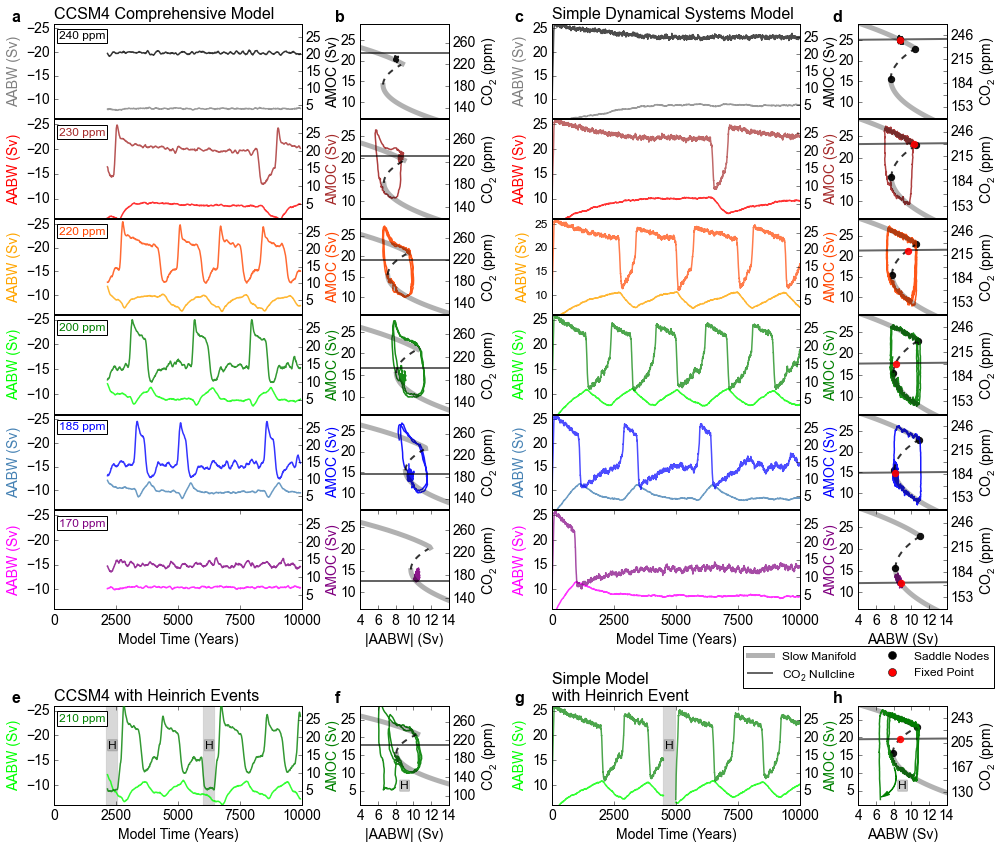

In [86]:
fig = plt.figure(figsize=(16,14))

##### plot dependance on CO2


############## Set up grid spec

gsheight = 180
hdivs = 9
gsrange = np.linspace(0,gsheight,hdivs)
gs = gridspec.GridSpec(gsheight, 140)

# widths for GCM
x1 = 0
x2 = 39
x3 = 48
x4 = 62
# widths for conceptual model 
x5 = 78
x6 = 117
x7 = 126
x8 = 140

# GCM timeseries panels
ax0 = plt.subplot(gs[int(gsrange[0]):int(gsrange[1]), x1:x2])
ax1 = plt.subplot(gs[int(gsrange[1]):int(gsrange[2]), x1:x2])
ax2 = plt.subplot(gs[int(gsrange[2]):int(gsrange[3]), x1:x2])
ax3 = plt.subplot(gs[int(gsrange[3]):int(gsrange[4]), x1:x2])
ax4 = plt.subplot(gs[int(gsrange[4]):int(gsrange[5]), x1:x2])
ax5 = plt.subplot(gs[int(gsrange[5]):int(gsrange[6]), x1:x2])
# for heinrich
ax6 = plt.subplot(gs[int(gsrange[6]):int(gsrange[7]), x1:x2])
ax7 = plt.subplot(gs[int(gsrange[7]):int(gsrange[8]), x1:x2])
ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]
ax_lr = [ax0.twinx(), ax1.twinx(), ax2.twinx(), ax3.twinx(), ax4.twinx(), ax5.twinx(), ax6.twinx(), ax7.twinx()]
# GCM phase portraits

ax0r = plt.subplot(gs[int(gsrange[0]):int(gsrange[1]), x3:x4])
ax1r = plt.subplot(gs[int(gsrange[1]):int(gsrange[2]), x3:x4])
ax2r = plt.subplot(gs[int(gsrange[2]):int(gsrange[3]), x3:x4])
ax3r = plt.subplot(gs[int(gsrange[3]):int(gsrange[4]), x3:x4])
ax4r = plt.subplot(gs[int(gsrange[4]):int(gsrange[5]), x3:x4])
ax5r = plt.subplot(gs[int(gsrange[5]):int(gsrange[6]), x3:x4])
# for heinrich
ax6r = plt.subplot(gs[int(gsrange[6]):int(gsrange[7]), x3:x4])
ax7r = plt.subplot(gs[int(gsrange[7]):int(gsrange[8]), x3:x4])
axr = [ax0r, ax1r, ax2r, ax3r, ax4r, ax5r, ax6r, ax7r]
ax_rr = [ax0r.twinx(), ax1r.twinx(), ax2r.twinx(), ax3r.twinx(), ax4r.twinx(), ax5r.twinx(), ax6r.twinx(), ax7r.twinx()]

# SM timeseries panels
ac0 = plt.subplot(gs[int(gsrange[0]):int(gsrange[1]), x5:x6])
ac1 = plt.subplot(gs[int(gsrange[1]):int(gsrange[2]), x5:x6])
ac2 = plt.subplot(gs[int(gsrange[2]):int(gsrange[3]), x5:x6])
ac3 = plt.subplot(gs[int(gsrange[3]):int(gsrange[4]), x5:x6])
ac4 = plt.subplot(gs[int(gsrange[4]):int(gsrange[5]), x5:x6])
ac5 = plt.subplot(gs[int(gsrange[5]):int(gsrange[6]), x5:x6])
# for heinrich
ac6 = plt.subplot(gs[int(gsrange[6]):int(gsrange[7]), x5:x6])
ac7 = plt.subplot(gs[int(gsrange[7]):int(gsrange[8]), x5:x6])
ac = [ac0, ac1, ac2, ac3, ac4, ac5, ac6, ac7]
ac_lr = [ac0.twinx(), ac1.twinx(), ac2.twinx(), ac3.twinx(), ac4.twinx(), ac5.twinx(), ac6.twinx(), ac7.twinx()]
# SM phase portraits

ac0r = plt.subplot(gs[int(gsrange[0]):int(gsrange[1]), x7:x8])
ac1r = plt.subplot(gs[int(gsrange[1]):int(gsrange[2]), x7:x8])
ac2r = plt.subplot(gs[int(gsrange[2]):int(gsrange[3]), x7:x8])
ac3r = plt.subplot(gs[int(gsrange[3]):int(gsrange[4]), x7:x8])
ac4r = plt.subplot(gs[int(gsrange[4]):int(gsrange[5]), x7:x8])
ac5r = plt.subplot(gs[int(gsrange[5]):int(gsrange[6]), x7:x8])
# for heinrich
ac6r = plt.subplot(gs[int(gsrange[6]):int(gsrange[7]), x7:x8])
ac7r = plt.subplot(gs[int(gsrange[7]):int(gsrange[8]), x7:x8])
acr = [ac0r, ac1r, ac2r, ac3r, ac4r, ac5r, ac6r, ac7r]
ac_rr = [ac0r.twinx(), ac1r.twinx(), ac2r.twinx(), ac3r.twinx(), ac4r.twinx(), ac5r.twinx(), ac6r.twinx(), ac7r.twinx()]


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
# set truetype fonts
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# try to set subscript to regular (this gets rid of cr10 font default)
params = {'mathtext.default': 'regular' }          
mpl.rcParams.update(params)

#######################################################################################################
######## CLIMATE MODEL
#######################################################################################################

# plot parameters
# averaging of model timeseries
timemean = 10 # 100 years

axeslsize = 14  # axes label font size
legfsize = 12 # leg label font size
numfsize = 14 # axes num font size
acols = ['black','brown', 'orangered', 'green', 'blue', 'purple', 'green', 'green']
aacols = ['grey','red', 'orange', 'lime', 'steelblue', 'fuchsia', 'lime', 'lime']
amoc_run = ['240 ppm', '230 ppm', '220 ppm', '200 ppm', '185 ppm', '170 ppm', '', '210 ppm']

xmin = cftime.num2date(0*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
xmax = cftime.num2date(10000*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
ymin = 1 # right axis range
ymax = 29
rymin = -26 # left axis range
rymax = -6
legloc = (0.6,0.7) # AMOC legend location
rlegloc = (0.01,0.1) # AABW legend location

legcol = 1 # legend color index (see above)

# manifold thinkness and transparency
manilw1 = 5.0 # slowmanifold top and bottom width
manilw1a = 2.0 # unstable branch of slowmanifold
manilw2 = 2.0 # co2 nullcline
manialp1 = 0.3 # slowmanifold transparency
manialp1a = 0.8 # slowmanifold transparency (unstable)
manialp2 = 0.6 # co2 nullcline transparency
clinecol='black'
slowmancol = 'black'
#################################
####### add in the runs in grey where the simulations were branched from
# CO2=185, co2=185fwf , co2=210fwf
spinstart=-3
spincol = 'grey'
spinalp = 0.5
spinlabel = ''
##################################
# AMOC runs ordered for CO2 levels
amoc_list = [8, 7, 5, 2, 1, 0, 4, 4]

shadezo=-1
# vertical grid lines
for i in range(0,8):

    ax_lr[i].set_title("")
    ax_lr[i].set_xlim(xmin, xmax)
    ax_lr[i].set_ylim(ymin, ymax)
    ax_lr[i].set_ylabel("AMOC (Sv)",size=axeslsize)

    if i != 6:
        # AABW
        #lstyle = 'dotted'
        #lstyle = '-'
        lstyle = '-'
        rlalp = 0.8
        lw=1.5
        aabw_max_list[amoc_list[i]].rolling(time=timemean, center=True).mean().dropna("time").plot(ax=ax[i], color=aacols[i],alpha=rlalp, linewidth=lw, label="AABW", 
                                        linestyle = lstyle, zorder=0)
        ax[i].axes.get_xaxis().set_visible(False)
        #axtmpr.axes.get_yaxis().set_visible(False)
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(rymin, rymax)
        #ax[i].set_ylabel("AABW (Sv)",size=axeslsize)
        ax[i].set_ylabel("AABW (Sv)", size=axeslsize, color=aacols[i])
        ax[i].set_title("")
        ax[i].set_frame_on(True)
        setaxesfsize(ax[i], numfsize)
        ax[i].invert_yaxis()

        # AMOC
        lalp=0.8

        amoc_max_list[amoc_list[i]].rolling(time=timemean, center=True).mean().dropna("time").plot(ax=ax_lr[i], color=acols[i],alpha=lalp, linewidth=lw, label='AMOC',
                                        zorder=0)
        # axes range, labels, title, remove axes frame, set legend
        ax_lr[i].set_xlim(xmin, xmax)
        ax_lr[i].set_ylim(ymin, ymax)
        ax_lr[i].set_ylabel("AMOC (Sv)", size=axeslsize, color=acols[i])
        ax_lr[i].set_frame_on(False)
        if i < 5:
            ax_lr[i].axes.get_xaxis().set_visible(False)
        else:
            ax_lr[i].axes.get_xaxis().set_visible(True)       
        ax_lr[i].axes.get_yaxis().set_visible(True)
        setaxesfsize(ax_lr[i], numfsize)
        ax_lr[i].set_title("")

        # co2 level text
        ax_lr[i].text(0.02, 0.84, amoc_run[i], transform=ax_lr[i].transAxes, color=acols[i], size=12, zorder=5,
            bbox={'facecolor':'white','alpha':1.0,'edgecolor':'black','pad':2}).set_zorder(3)

        ax_lr[i].set_zorder(ax[i].get_zorder()+1) # put ax in front of ax2
        ax_lr[i].patch.set_visible(False) # hide the 'canvas'

# a couple of independant labels
ax_lr[0].set_title(r"CCSM4 Comprehensive Model", size=16, loc='left')
ax_lr[5].set_xlabel("Model Time (Years)",size=axeslsize)
ax_lr[7].set_xlabel("Model Time (Years)",size=axeslsize)

# change xaxis minus to positive and add abs(AABW)
axr[5].set_xticks([-14,-12,-10,-8,-6,-4])
axr[5].set_xticklabels(['14','12','10','8','6','4'])
axr[7].set_xticks([-14,-12,-10,-8,-6,-4])
axr[7].set_xticklabels(['14','12','10','8','6','4'])

# Fix 0000 on rightmost corner of x-axis (probably due to cftime)
x0 = cftime.num2date(0*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
x2500 = cftime.num2date(2500*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
x5000 = cftime.num2date(5000*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
x7500 = cftime.num2date(7500*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
x10000 = cftime.num2date(10000*365, 'days since 0000-01-01 00:00:00', calendar='noleap')

ax[5].set_xticks([x0, x2500, x5000, x7500, x10000])
ax[5].set_xticklabels(['0','2500','5000','7500','10000'])
ax[7].set_xticks([x0, x2500, x5000, x7500, x10000])
ax[7].set_xticklabels(['0','2500','5000','7500','10000'])

##########################################################################################
# CCSM4 Phase plots
##########################################################################################
#use ymin ymax from above
xmin = -14 # right axis range
xmax = -4
ymin = 6 # right axis range
ymax = 29

# do phase plot of AABW (x) vs AMOC (y)
# but make an arguement for removing the transients before year 5000 ! for stable remove before 7500
for i in range(0,8):
    if i != 6:
        aabw_eqlib = aabw_max_list[amoc_list[i]].sel(time = slice('5100-01-01', '9999-01-01'))
        amoc_eqlib = amoc_max_list[amoc_list[i]].sel(time = slice('5000-01-01', '9999-01-01'))[0:aabw_eqlib.time.values.shape[0]]
        
        axr[i].plot(aabw_eqlib.rolling(time=timemean, center=True).mean().dropna("time"),
                       amoc_eqlib.rolling(time=timemean, center=True).mean().dropna("time"),
                       color=acols[i], alpha=0.9, linewidth=lw)
        
    axr[i].set_xlim(xmin, xmax)
    axr[i].set_ylim(ymin, ymax)
    axr[i].set_frame_on(False)
    if i == 6:
        axr[i].axes.get_xaxis().set_visible(False)
    elif i <5:
        axr[i].axes.get_xaxis().set_visible(False)       
    else:
        axr[i].axes.get_xaxis().set_visible(True)       

axr[5].set_xlabel("|AABW| (Sv)",size=axeslsize)
axr[7].set_xlabel("|AABW| (Sv)",size=axeslsize)

# This next section is used as an illustration to show where
# the slow manifold and nullcline may be in the complex model
def stommel(x, a, b, c, x0):
    return np.abs(a + b*(x + x0))*(x + x0) + c
amoc_x = np.linspace(8,32,1000)
width = [0.5, 0.5, 0.1, 0.0, 0.1, 0.5, 0.5, 0.0]
xshift = [0.2, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
yshift = [-0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
cshift = [-0.8, -1.0, -1.5, -2.5, -3.5, -4.0, -2.5, -2.5]
co2s = [240., 230., 220., 200., 185., 170., 210., 210.]
for i in range(0,8):
    a = -8.5 - xshift[i]
    b = 8 + width[i]
    c = -8 + cshift[i]
    x0 = -10.

    # saddle points
    locmin = argrelextrema(stommel(amoc_x, a, b, c, x0), np.less)[0][0]
    locmax = argrelextrema(stommel(amoc_x, a, b, c, x0), np.greater)[0][0]
    if i < 6 or i == 7:
        # plot upside down inverted "2" manifold
        ystrech  = 10.0
        shiftdown = -90
        axr[i].plot(stommel(amoc_x, a, b, c, x0)[0:locmax], shiftdown + ystrech*(amoc_x + yshift[i])[0:locmax], color=slowmancol, alpha=manialp1, linewidth=manilw1, label="D-O Manifold")
        axr[i].plot(stommel(amoc_x, a, b, c, x0)[locmax:locmin], shiftdown + ystrech*(amoc_x + yshift[i])[locmax:locmin], color=slowmancol, alpha=manialp1a, linewidth=manilw1a, linestyle='--')
        axr[i].plot(stommel(amoc_x, a, b, c, x0)[locmin:-1], shiftdown + ystrech*(amoc_x + yshift[i])[locmin:-1], color=slowmancol, alpha=manialp1, linewidth=manilw1)

            
    if i < 6:
        setaxesfsize(axr[i], numfsize)

        # plot CO2 on the right hand side
        ax_rr[i].hlines(co2s[i], xmin, xmax, color=clinecol, label="CO$_2$ Manifold", lw=manilw2, alpha = manialp2)
        ax_rr[i].set_xlim(xmin, xmax)
        # co2 min max
        cymin = 120 # right axis range
        cymax = 295
        ax_rr[i].set_ylim(cymin, cymax)
        ax_rr[i].set_ylabel("CO$_2$ (ppm)",size=axeslsize, color=clinecol)
        #set co2 ticks
        yticks=[140., 180., 220., 260.]
        ax_rr[i].set_yticks(yticks)
        #set co2 labels
        ylabels=["140","180","220","260"]
        ax_rr[i].set_yticklabels(ylabels)
        setaxesfsize(ax_rr[i], numfsize)
        axr[i].invert_xaxis()
    elif i == 7: # Heinrich
        setaxesfsize(axr[i], numfsize)
        # plot CO2 on the right hand side
        ax_rr[i].hlines(co2s[i], xmin, xmax, color=clinecol, label="CO$_2$ Manifold", lw=manilw2, alpha = manialp2)
        ax_rr[i].set_xlim(xmin, xmax)
        # co2 min max
        cymin = 80 # right axis range
        cymax = 295
        ax_rr[i].set_ylim(cymin, cymax)
        ax_rr[i].set_ylabel("CO$_2$ (ppm)",size=axeslsize, color=clinecol)
        #set co2 ticks
        yticks=[100, 140., 180., 220., 260.]
        ax_rr[i].set_yticks(yticks)
        #set co2 labels
        ylabels=["100","140","180","220","260"]
        ax_rr[i].set_yticklabels(ylabels)
        setaxesfsize(ax_rr[i], numfsize)
        axr[i].invert_xaxis()
        

# get rid of dummy plot at location 7 (just a filler)
ax[6].set_axis_off() 
ax_lr[6].set_axis_off() 
axr[6].set_axis_off() 
ax_rr[6].set_axis_off() 

ax_lr[7].set_title(r"CCSM4 with Heinrich Events", size=16, loc='left')

# FWF text 
fwf_color = 'steelblue'
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc=fwf_color, ec=fwf_color, lw=1.5)
ax[7].add_patch(FancyBboxPatch((0.6, 0.00),
                        width=.05, height=1.0, clip_on=False,
                        boxstyle="square,pad=0", zorder=shadezo, lw=0.1,
                        facecolor='grey', alpha=0.3,
                        transform=ax[7].transAxes))
ax[7].add_patch(FancyBboxPatch((0.21, 0.00),
                        width=.05, height=1.0, clip_on=False,
                        boxstyle="square,pad=0", zorder=shadezo, lw=0.1,
                        facecolor='grey', alpha=0.3,
                        transform=ax[7].transAxes))

bbox_props = dict(boxstyle="square, pad=0.3", fc=fwf_color, ec=fwf_color, lw=1.)


#change limits on Heinrich plot

ymin = 1 # right axis range
ymax = 29
lymin = -26 # left axis range
lymax = -6

ax[7].set_ylim(lymin, lymax)
ax_lr[7].set_ylim(ymin, ymax)
axr[7].set_ylim(ymin, ymax)
ax[7].invert_yaxis()

halpha=0.4
hypos = -17 # temp axis 
hlabels = ["H", "H"]
h0time = cftime.num2date(2540*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
h1time = cftime.num2date(6440*365, 'days since 0000-01-01 00:00:00', calendar='noleap')

hboxcol = 'grey'
hxpos = [h0time, h1time]
for i in range(0,2):
    ax[7].annotate(
            hlabels[i], 
            xy = (hxpos[i], hypos), xytext = (0, 0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.05', fc = hboxcol, ec=hboxcol, alpha = halpha),
            fontsize=12)

# put an H in phase space
hxpos = -9.5
hypos = 5.0
axr[7].annotate(
        "H", 
        xy = (hxpos, hypos), xytext = (0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = hboxcol, ec=hboxcol, alpha = halpha),
        fontsize=12)

#######################################################################################################
######## CONCEPTUAL MODEL of the D-O oscillation
#######################################################################################################

xcol = 'red'
ycol = 'blue'
lw = 1.5
lalp = 0.7

# phase portrait parameters
phlw=3.0
# parameters for the phase plots
xcol = 'red'
ycol = 'blue'
phasecol = 'blue'
phlw=1.0
phalp = 0.5
nodesize = 40
smanicol = 'black' 
# left plots

#co2arr = [25.0, 23.5, 20.0, 16.0, 14.0, 12.0, 18.0, 18.0]
co2arr = [240.0, 230.0, 220.0, 200.0, 185.0, 170.0, 210.0, 210.0]
aabw_shiftx = 5

# ODE or SDE
stochbool=True
dW=0.07

# do a simple scaling for co2 on rightmost axis
def co2levfromsv(sv):
    co2lev = c1 + (sv - a1)*(c2 - c1)/(a2 - a1)
    #print (co2lev)
    return co2lev

for i in range(0,8):


    if i != 6:
        # get the simple model data for each CO2 level
        # functiopn returns ysnd, bxnd, psnd, clinend, AMOC_dim, AABW_dim, time*tc 
        ys, bx, ps, cline, xdata_gv1, ydata_gv1, tdata_gv1 = scdom(co2arr[i], dW, stochbool, Heinrich=False)
        #print(ys)
        #print(ps)
        lstyle = '-'
        llalp = 0.8
        rlalp = 0.8
        # for reference
        #ac[ip].plot(np.array(tdata_gv1*tc), np.array(aabw_shiftx+1.0e-6*b_aabw*ydata_gv1*dB0), color=aabw_col, linewidth=lw, alpha=rlalp, label='AABW', linestyle='-')
        #ac_lr[ip].plot(np.array(tdata_gv1*tc), np.array(1.0e-6*(a_amoc + b_amoc*xdata_gv1*db0)), color=amoc_col, linewidth=lw, alpha=lalp, label=r'AMOC')

        if i != 6 and i != 7:
            # scale to Sv
            ac[i].plot(np.array(tdata_gv1), np.array(ydata_gv1), color=aacols[i], linewidth=lw, alpha=rlalp, label='AABW', linestyle='-')
            ac_lr[i].plot(np.array(tdata_gv1), np.array(xdata_gv1), color=acols[i], linewidth=lw, alpha=lalp, label=r'AMOC')
        elif i == 7: #for heinrich simple model 
            # for end at 8000 years
            i6000 = 2700
            ac[i].plot(np.array(tdata_gv1)[0:i6000], np.array(ydata_gv1)[0:i6000], color=aacols[i], linewidth=lw, alpha=rlalp, label='AABW', linestyle='-')
            ac_lr[i].plot(np.array(tdata_gv1)[0:i6000], np.array(xdata_gv1)[0:i6000], color=acols[i], linewidth=lw, alpha=lalp, label=r'AMOC')

        ac[i].set_ylabel("AABW (Sv)", size=axeslsize, color=aacols[i])
        ac_lr[i].set_ylabel("AMOC (Sv)", size=axeslsize, color=acols[i])
        xmin = 4 # right axis range
        xmax = 14
        rymin = 6 # left axis range
        rymax = 26
        ymin = 1 # right axis range
        ymax = 29

        ac[i].set_ylim(rymin, rymax)
        ac_lr[i].set_ylim(ymin, ymax)
        ac[i].set_xlim(0,10000)
        ac_lr[i].set_xlim(0,10000)

        setaxesfsize(ac[i], numfsize)
        setaxesfsize(ac_lr[i], numfsize)
        # remove bottom number on left axis
        ticklabelac = ac[i].get_yticklabels()
        ticklabelac_lr = ac_lr[i].get_yticklabels()
        iy=0
        for labely in ticklabelac:
            if iy == 0:
                labely.set_visible(False)
            iy+=1
        labely.set_visible(False)
        iy=0
        for labely in ticklabelac_lr:
            if iy == 0:
                labely.set_visible(False)
            iy+=1
        labely.set_visible(False)
        if i <= 5:
            ac_lr[i].axes.get_xaxis().set_visible(False)
        else:
            ac_lr[i].axes.get_xaxis().set_visible(True)       
        ac_lr[i].axes.get_yaxis().set_visible(True)
        ac[i].axes.get_xaxis().set_visible(False)
        ac[i].set_title("")
        ac[i].set_frame_on(True)
        if i == 5 or i == 7:
            ac_lr[i].set_xlabel("Model Time (Years)", size=14)
            ac_lr[i].axes.get_xaxis().set_visible(True)
        dotsize=0.5
        acr[i].plot(np.array(ydata_gv1)[3001:], np.array(xdata_gv1)[3001:], color=acols[i], alpha=0.9, linewidth=lw)

        try:
            locmin = argrelextrema(ps, np.less)[0][0]
            locmax = argrelextrema(ps, np.greater)[0][0]
            saddlecol='black'
            acr[i].scatter(ps[locmin], ys[locmin], s=nodesize, c=saddlecol, alpha=0.9, label="Saddle Nodes")            
            acr[i].scatter(ps[locmax], ys[locmax], s=nodesize, c=saddlecol, alpha=0.9)
            acr[i].plot(ps[0:locmin], ys[0:locmin], color=slowmancol, linewidth=manilw1, alpha=manialp1, label="Slow Manifold")
            acr[i].plot(ps[locmin:locmax], ys[locmin:locmax], color=slowmancol, linewidth=manilw1a, alpha=manialp1a, linestyle='--')
            acr[i].plot(ps[locmax:], ys[locmax:], color=slowmancol, linewidth=manilw1, alpha=manialp1)
        except:
            acr[i].plot(ps, ys, color=smanicol, linewidth=manilw1, alpha=manialp1)

        ymin = 6 # y axis range
        ymax = 29
        acr[i].set_ylim(ymin,ymax)
        acr[i].set_xlim(4,14)

        co2manp = acr[i].plot(bx, cline, color=clinecol, linewidth=manilw2, alpha=manialp2, label="CO$_2$ Nullcline")
        #acr[i].set_title("Phase Space", size=18)
        tl = ac2.get_yticklabels()
        tb = ac2.get_xticklabels()
        tickfsize = 12
        for labelx in tb:
            labelx.set_fontsize(tickfsize)
        for labely in tl:
            labely.set_fontsize(tickfsize)

        # insert paramter text
        pbbox={'facecolor':'white','alpha':1.0,'edgecolor':'white','pad':1}
        pyl = 0.05

        setaxesfsize(acr[i], numfsize)
        #ticklabelac = acr[i].get_yticklabels()
        #iy=0
        #for labely in ticklabelac:
        #    if iy == 0:
        #        labely.set_visible(False)
        #    iy+=1
        #labely.set_visible(False)
        acr[i].axes.get_xaxis().set_visible(False)
        acr[i].set_title("")
        acr[i].set_frame_on(True)
        if i == 5 or i == 7:
            acr[i].set_xlabel("AABW (Sv)", size=14)
            acr[i].axes.get_xaxis().set_visible(True)

        ac_rr[i].axes.get_xaxis().set_visible(False)
        ac_rr[i].set_ylabel("CO$_{2}$ (ppm)", size=14, color=clinecol)
        setaxesfsize(ac_rr[i], numfsize)
        iy=0
        # set CO2 labels on right
        # scale from AMOC = 6 to 29 Sv
        # scale 170ppm to 240 from 12Sv to 25Sv
        # use the linear relation between co2 and amoc strength for linear nullcline axis marks
        a2 = 25
        a1 = 12
        c2 = 240
        c1 = 170
        #sv = (co2arr - c1)*(a2 - a1)/(c2 - c1) + a1
        # find co2 bot and top
        co2bot = co2levfromsv(ymin)
        co2top = co2levfromsv(ymax)
        #print (co2bot)
        #print (co2top)
        co2ticks = np.linspace(co2bot,co2top,9)
        #print (co2ticks)
        ac_rr[i].set_ylim(co2bot, co2top)
        ac_rr[i].set_yticks(co2ticks)
        #ac_rr[i].set_yticks([-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5, 2.0])
        co2strs = [ str(round(co2ticks[i])) for i in range(0,9) ]
        #print (co2str)
        co2str = ["",co2strs[1],"",co2strs[3],"",co2strs[5],"",co2strs[7],""]
        ac_rr[i].set_yticklabels(co2str)
        setaxesfsize(ac_rr[i], numfsize)

        # intersection of 2 manifolds
        idx = np.argwhere(np.diff(np.sign(ps - cline))).flatten()[0]
        idy = np.argwhere(np.diff(np.sign(ys - cline))).flatten()[0]
        acr[i].scatter(ps[idy], cline[idx], c='r', s=nodesize, alpha=0.9, edgecolor='red', label="Fixed Point", zorder=10)

        # zero line on left
        ac[i].axhline(0,0,1, color='black', linewidth=0.5)
        
# make one legend
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                      markersize=8, label='Fixed Point')
black_circle = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                      markersize=8, label='Saddle Nodes')
handles, labels = acr[0].get_legend_handles_labels()
acr[7].legend([handles[0], handles[1], black_circle, red_circle], labels, loc=(-1.3,1.18), ncol=2, fontsize=12, numpoints=1)
        
# get rid of dummy plot at location 7 (just a filler)
ac[6].set_axis_off() 
ac_lr[6].set_axis_off() 
acr[6].set_axis_off() 
ac_rr[6].set_axis_off() 

ac_lr[0].set_title(r"Simple Dynamical Systems Model", size=16, loc='left')

# custome xaxis for simple model timeseries
ac[5].set_xticks([0.,2500.,5000.,7500.,10000.])
ac_lr[5].set_xticks([0.,2500.,5000.,7500.,10000.])
ac[7].set_xticks([0.,2500.,5000.,7500.,10000.])
ac_lr[7].set_xticks([0.,2500.,5000.,7500.,10000.])

# figure labels (make it look like Nature)
lbfs=16
labelxpos = -0.17
labelypos = 1.15
ax[0].text(labelxpos, labelypos, "a", ha='left', va='top', size=lbfs, weight='bold', transform=ax[0].transAxes)
labelxpos = -0.29
axr[0].text(labelxpos, labelypos, "b", ha='left', va='top', size=lbfs, weight='bold', transform=axr[0].transAxes)
#labelxpos = -0.2
#labelypos = 1.15
labelxpos = -0.15
ac[0].text(labelxpos, labelypos, "c", ha='left', va='top', size=lbfs, weight='bold', transform=ac[0].transAxes)
labelxpos = -0.29
acr[0].text(labelxpos, labelypos, "d", ha='left', va='top', size=lbfs, weight='bold', transform=acr[0].transAxes)

labelxpos = -0.17
labelypos = 1.15
ax[7].text(labelxpos, labelypos, "e", ha='left', va='top', size=lbfs, weight='bold', transform=ax[7].transAxes)
labelxpos = -0.29
#labelypos = 1.2
axr[7].text(labelxpos, labelypos, "f", ha='left', va='top', size=lbfs, weight='bold', transform=axr[7].transAxes)
labelxpos = -0.15
ac[7].text(labelxpos, labelypos, "g", ha='left', va='top', size=lbfs, weight='bold', transform=ac[7].transAxes)
labelxpos = -0.29
#labelypos = 0.2
acr[7].text(labelxpos, labelypos, "h", ha='left', va='top', size=lbfs, weight='bold', transform=acr[7].transAxes)

# create another simple model heinrich event (new initial condition) (just repeat the experiment and start time at year 6500)
ys, ps, bx, cline, xdata_gv1, ydata_gv1, tdata_gv1 = scdom(co2arr[6], dW, stochbool, Heinrich=True)
# for 6500 years
#t6500 = 4*6500 # start concated series at 6500
#i3500 = 4*3500 # run for first 3500 years of adjustment
#icstart = 30 # how far in after IC to start (we want to start at 5 Sv AMOC)
tst = 5000 # start concated series at 7000
i3500 = 1000 # run for first x years of adjustment
icstart = 0 # how far in after IC to start (we want to start at 5 Sv AMOC)
# timeseries portion
ac[7].plot(tst + np.array(tdata_gv1), np.array(ydata_gv1), color=aacols[6], linewidth=lw, alpha=rlalp, label='AABW', linestyle='-')
ac_lr[7].plot(tst + np.array(tdata_gv1), np.array(xdata_gv1), color=acols[6], linewidth=lw, alpha=lalp, label=r'AMOC')
# phase plot portion
acr[7].plot(np.array(ydata_gv1)[icstart:i3500], np.array(xdata_gv1)[icstart:i3500], color=acols[6], alpha=0.9, linewidth=lw)

# heinrich simple model range
#change limits on Heinrich plot

ymin = 1 # right axis range
ymax = 29
lymin = 6 # left axis range
lymax = 26

ac[7].set_ylim(lymin, lymax)
ac_lr[7].set_ylim(ymin, ymax)
acr[7].set_ylim(ymin, ymax)
#rymin = 1 # right axis range
#rymax = 36
#ac[7].set_ylim(rymin, rymax)
#ac_lr[7].set_ylim(ymin, ymax)

# set the co2 axis for Heinrich levels
co2bot = co2levfromsv(ymin)
co2top = co2levfromsv(ymax)
#print (co2bot)
#print (co2top)
co2ticks = np.linspace(co2bot,co2top,9)
#print (co2ticks)
ac_rr[i].set_ylim(co2bot, co2top)
ac_rr[i].set_yticks(co2ticks)
#ac_rr[i].set_yticks([-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5, 2.0])
co2strs = [ str(round(co2ticks[i])) for i in range(0,9) ]
#print (co2str)
co2str = ["",co2strs[1],"",co2strs[3],"",co2strs[5],"",co2strs[7],""]
ac_rr[i].set_yticklabels(co2str)
setaxesfsize(ac_rr[i], numfsize)


ac_lr[7].set_title("Simple Model\nwith Heinrich Event", size=16, loc='left')



ac[7].add_patch(FancyBboxPatch((0.45, 0.00),
                        width=.05, height=1.0, clip_on=False,
                        boxstyle="square,pad=0", zorder=shadezo, lw=0.1,
                        facecolor='grey', alpha=0.3,
                        transform=ac[7].transAxes))
hboxcol = 'grey'
halpha=0.4
hxpos = 4900
hypos = 17
hlabels = "H"
ac[7].annotate(
        hlabels, 
        xy = (hxpos, hypos), xytext = (0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = hboxcol, ec=hboxcol, alpha = halpha),
        fontsize=12)
# put an H in phase space
hxpos = 9.5
hypos = 5
acr[7].annotate(
        hlabels, 
        xy = (hxpos, hypos), xytext = (0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = hboxcol, ec=hboxcol, alpha = halpha),
        fontsize=12)


style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color=acols[6])
harr = patches.FancyArrowPatch((8., 12.), (6.4, 3.),
                             connectionstyle="arc3,rad=-0.5", **kw)
acr[7].add_patch(harr)

# for non-stochastic
icepaperdir="./plots/"
saveplot=False
if saveplot and stochbool == False:
    plt.savefig(icepaperdir+"Figure2_no_dW.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
    plt.savefig(icepaperdir+"Figure2_no_dW.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
icepaperdir="./plots/"
# for stochastic
saveplot=False
if saveplot and stochbool == True:
    plt.savefig(icepaperdir+"Figure2.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
    plt.savefig(icepaperdir+"Figure2.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)